# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

df = pd.read_csv('data/human_body_temperature.csv')

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


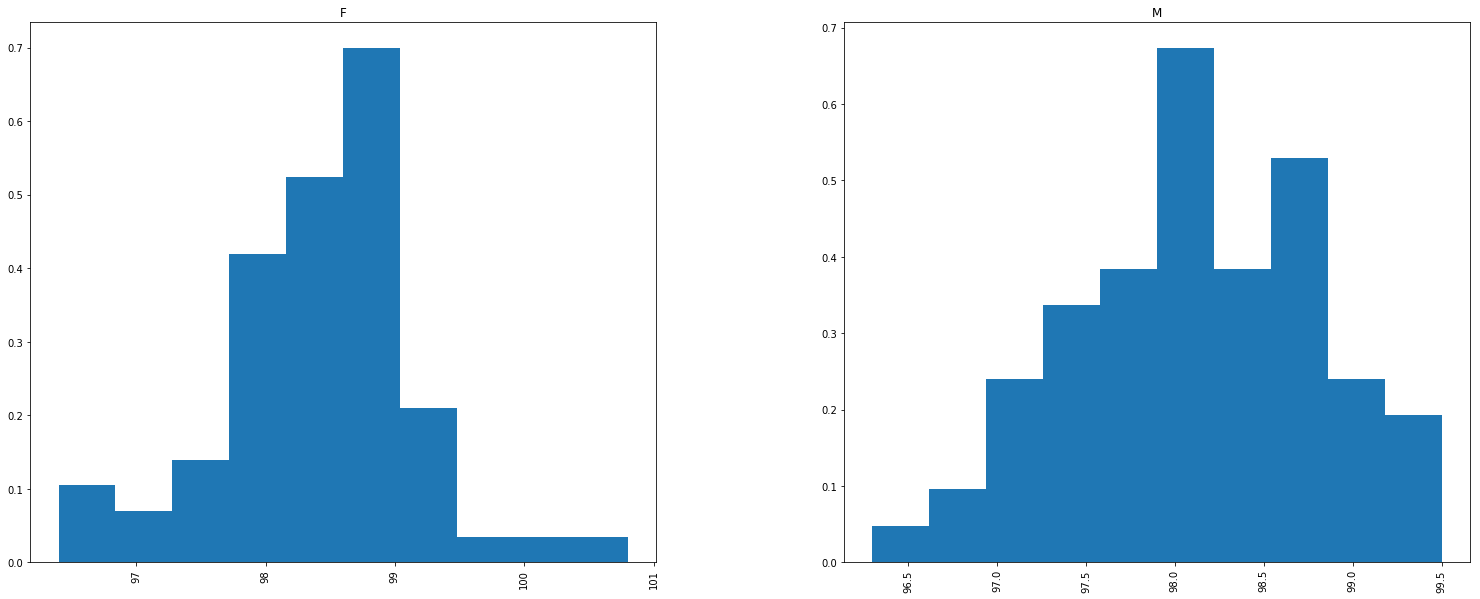

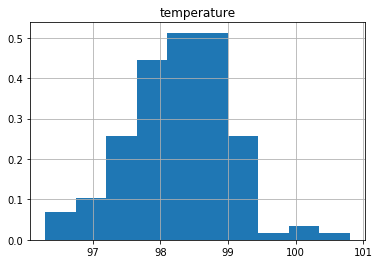

In [2]:
# Your work here.
print(df.head())
print(df.describe())
hist_temperature_by_gender = df.hist(
    by='gender', layout=(1,2) , figsize=(25,10), column='temperature', label='temperature', density='True'
)
hist_temp = df.hist(column='temperature', density=True)

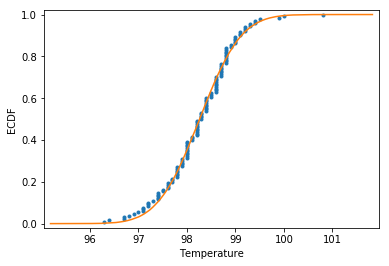

In [3]:
ecdf_x = np.sort(df['temperature'])
ecdf_y = np.arange(1, len(ecdf_x)+1)/len(ecdf_x)
plt.plot(ecdf_x, ecdf_y, marker='.', linestyle='none')

no_outliers_temp = np.clip(df['temperature'], 97, 100)

mean=np.mean(no_outliers_temp)
std = np.std(no_outliers_temp)

normal_temperature = np.random.normal(mean, std, size=100000)

theor_x, theor_y = ecdf(normal_temperature)
plt.plot(theor_x, theor_y)

plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

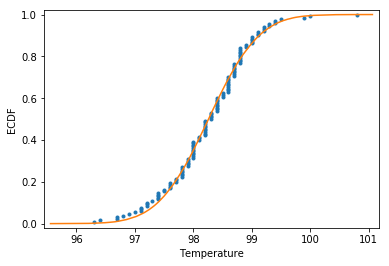

In [4]:
ecdf_x = np.sort(df['temperature'])
ecdf_y = np.arange(1, len(ecdf_x)+1)/len(ecdf_x)
plt.plot(ecdf_x, ecdf_y, marker='.', linestyle='none')

no_outliers_temp = np.clip(df['temperature'], 97, 100)

mean=np.mean(no_outliers_temp)
std = np.std(no_outliers_temp)

normal_temperature = np.random.normal(mean, std, size=100000)

theor_x, theor_y = ecdf(normal_temperature)
plt.plot(theor_x, theor_y)

plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

Yes data size is enough to be consistent with Central Limit Theorem. Sample Mean aligns with Population Mea as the sample size grows and Variance of the Sample Meanvaries inversely to the size of the sample.

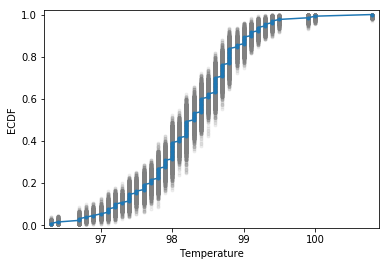

In [5]:
bootstrap_sample = np.random.choice(df['temperature'], size=130)
for _ in range(1000):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df['temperature'], size=130)

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(df['temperature'])
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


In [6]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.06405661469519336
0.06380927169640402


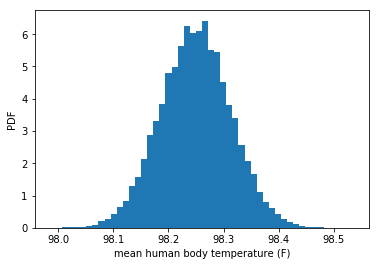

In [7]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['temperature'], np.mean, 100000)

# Compute and print SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean human body temperature (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [8]:
print(np.percentile(bs_replicates, [2.5, 97.5]))

[98.12384615 98.37461538]


In [9]:
# Make an array of translated temperature: translated_force_b
translated = df['temperature'] + 98.6 - np.mean(df['temperature'])

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Temperature: p
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


From above one sample bootstrap hypothesis test we can conclude that the two means are not the same and we had to apply one sample bootstrap hypothesis test because we only had data for current human body temperatures and not the old one.

In [10]:
ten_data_points = np.random.choice(df['temperature'], size=10)

0.3358571124749333
0.33895847400529633


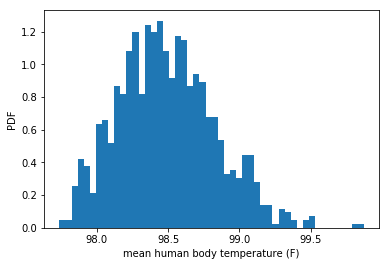

[97.89    99.18025]


In [11]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates_2 = draw_bs_reps(ten_data_points, np.mean, 1000)

# Compute and print SEM
sem = np.std(ten_data_points) / np.sqrt(len(ten_data_points))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates_2)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates_2, bins=50, density=True)
_ = plt.xlabel('mean human body temperature (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

print(np.percentile(bs_replicates_2, [2.5, 97.5]))

In [12]:
ten_data_points = np.random.choice(df['temperature'], size=10)
# Make an array of translated temperature: translated_force_b
translated_temp_b = ten_data_points + 98.6 - np.mean(ten_data_points)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates_translated = draw_bs_reps(translated_temp_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Temperature: p
p = np.sum(bs_replicates_translated <= np.mean(ten_data_points)) / 10000

# Print the p-value
print('p = ', p)

p =  0.1836


In [13]:
# Compute and print SEM
sem_b = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem_b)
sigma_away = 1.96*sem_b
upper = np.mean(df['temperature']) + 1.96*sem_b
lower = np.mean(df['temperature']) - 1.96*sem_b
print(sigma_away, upper, lower)

0.06405661469519336
0.125550964802579 98.37478173403336 98.12367980442819


In [22]:
sem_ten = np.std(ten_data_points) / np.sqrt(len(ten_data_points))

z_ten_data_score = (np.mean(ten_data_points) - 98.6)/sem_ten

print(z_ten_data_score)
from scipy.stats import norm
from scipy.stats import zscore
"""
  norm.cdf converts array of zscore to p-value
"""
print(norm.cdf(z_ten_data_score))

print(zscore(ten_data_points))

-0.9114082008878613
0.18104016709784476
[ 0.56270075  0.83718892  0.56270075  0.42545666  0.01372441 -2.31942504
 -1.08422827  1.24892118 -0.53525193  0.28821258]


In [15]:
# To answer the last question, we will perform two sample bootstrap test
# Hypothesis here is Male and Female temperature have the same Mean temperature as observed in the dataset.
split_temperature_data = df.groupby('gender')
female_temperature_data = split_temperature_data.get_group('F')['temperature']
male_temperature_data = split_temperature_data.get_group('M')['temperature']

f_mean = np.mean(female_temperature_data)
m_mean = np.mean(male_temperature_data)

diff_means = m_mean - f_mean

male_temperature_data_shifted = male_temperature_data - np.mean(male_temperature_data) + 98.25
female_temperature_data_shifted = female_temperature_data - np.mean(female_temperature_data) + 98.25

# Dra\\w 10000 bootstrap replicates of the mean for each shifted data
bs_reps_m = draw_bs_reps(male_temperature_data_shifted, np.mean, 10000)
bs_reps_f = draw_bs_reps(female_temperature_data_shifted, np.mean, 10000)
bs_reps_diff_mean = bs_reps_m - bs_reps_f

# Compute and print p-value: p
p = np.sum(bs_reps_diff_mean >= diff_means) / len(bs_replicates)
print('p-value =', p)
 
"""
  Above result suggests that ~98 percent of mean had  the bootstrap samples of the difference of the
  two means were greater than or equal to the observed mean.
  This rejects the null hypothesis that Female and Male Body temperatures are the same
"""




p-value = 0.9892


'\n  Above result suggests that ~98 percent of mean had  the bootstrap samples of the difference of the\n  two means were greater than or equal to the observed mean.\n  This nullifies our hypothesis that Female and Male Body temperatures are the same\n'

In [20]:
from scipy.stats import ttest_1samp
print(ttest_1samp(ten_data_points, 98.6))

"""
  Even though this indicates mean is 98.6 because we are using 10 data points we cannot solidify our argument
  Prev we did confirm 

"""

Ttest_1sampResult(statistic=-0.8646377378885816, pvalue=0.4096909892130567)


'\n  Even though this indicates mean is 98.6 because we are using 10 data points we cannot solidify our argument\n  Prev we did confirm \n\n'

In [17]:
ten_data_points


array([98.8, 99. , 98.8, 98.7, 98.4, 96.7, 97.6, 99.3, 98. , 98.6])